# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [2]:
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 뒤질것처럼 오늘을 살아라.'
tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique)

token2idx={}

for i in range(len(unique)):
    token2idx[unique[i]] = i    # i번째 해당하는 키워드에 i를 넣어준거라

encode = [token2idx[x] for x in tokens] # key? values만 불러오기
encode

[6, 5, 9, 1, 0, 8, 2, 3, 7, 4]

In [3]:
token2idx

{'것처럼': 9,
 '그리고': 8,
 '꾸어라.': 0,
 '꿈을': 1,
 '내일': 2,
 '뒤질것처럼': 3,
 '살': 5,
 '살아라.': 4,
 '오늘을': 7,
 '평생': 6}

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 뒤질것처럼 오늘을 살아라.'  # 

t = Tokenizer()
t.fit_on_texts([text])  # 토큰화 해줬지
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

# ?? 값이 이상한데..?
# 인코딩된 결과가

{'평생': 1, '살': 2, '것처럼': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '뒤질것처럼': 8, '오늘을': 9, '살아라': 10}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [5]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):   # j값이 같으면 1 추가
            temp.append(1)
        else:
            temp.append(0)

    one_hot.append(temp)

np.array(one_hot)


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공 

In [6]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

# 백터표현으로 바꾼거지
# 지금까지 3가지 방식으로 해봤어

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten


### 데이터 로드

In [8]:
num_words = 1000    # 단어의 갯수를 1000개로 한정
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =num_words)


17465344/17464789 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [10]:
print(x_train[0])   # 뭐 이미 잘 변환되어잇네
print(y_train[0])   # 1 이면 긍정데스네


[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [11]:
for i in range(10):
    if y_train[i] == 0:
        label= '부정'
    else:
        label = '긍정'

    print('{}\n{}'.format(x_train[i], label))   

    # 굳이 print를 안해도 그떄마다 저장된 label을 불러오면 되는구나

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# 문장의 길이는 당연히 제각각
# padding개념을 써보자!

num_words = 1000    # 단어의 갯수를 1000개로 한정
max_len = 100        # 이번엔 [100]개!

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')


In [14]:
print(len(x_train[0]))  
print(len(pad_x_train[0]))

# 길게쓴사람은 100개로 줄였지?


218
100


In [15]:
print(x_train[0])
print(pad_x_train[0])

# 호옹이 직접 본거지 줄인걸

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

## 모델 구성

In [16]:
model = Sequential()

model.add(Embedding(input_dim = num_words , output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           32000     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [17]:
model.compile( optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [18]:
history = model.fit(pad_x_train,y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

# regulazation이 없으니 당연 overfitting 되겟지

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5628 - acc: 0.7092 - val_loss: 0.4217 - val_acc: 0.8064
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3717 - acc: 0.8343 - val_loss: 0.3838 - val_acc: 0.8248
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3324 - acc: 0.8560 - val_loss: 0.3851 - val_acc: 0.8266
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3027 - acc: 0.8713 - val_loss: 0.3849 - val_acc: 0.8256
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2709 - acc: 0.8905 - val_loss: 0.4014 - val_acc: 0.8220
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2377 - acc: 0.9088 - val_loss: 0.4121 - val_acc: 0.8140
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2052 - acc: 0.9252 - val_loss: 0.4326 - val_acc: 0.8092
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

### 모델 시각화

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')




In [20]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

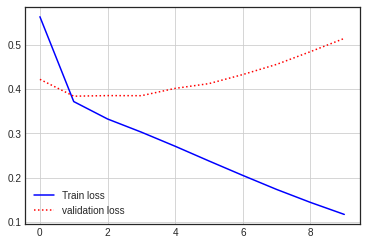

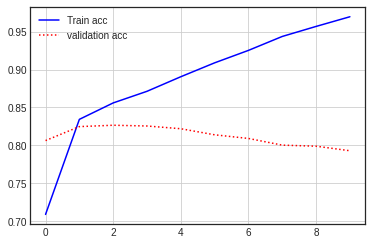

In [21]:
plt.plot(hist_dict['loss'], 'b-', label = 'Train loss')
plt.plot(hist_dict['val_loss'], 'r:', label = 'validation loss')
plt.legend()
plt.grid()


plt.figure()
plt.plot(hist_dict['acc'], 'b-', label = 'Train acc')
plt.plot(hist_dict['val_acc'], 'r:', label = 'validation acc')
plt.legend()
plt.grid()

# 바로 오버피팅 되버렷네

### 모델 평가

In [22]:
model.evaluate(pad_x_test, y_test)

# %80퍼센트 ㄴ왔네

782/782 [==============================] - 1s 2ms/step - loss: 0.4947 - acc: 0.8053


[0.4946540594100952, 0.8053200244903564]

### 단어의 수를 늘린 후 재학습

In [23]:
num_words = 2000    # 1000-> 2000
max_len= 400


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =num_words) # 다시 재설정 해줘야지


pad_x_train_2 = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test_2 = pad_sequences(x_test, maxlen = max_len, padding = 'pre')


데이터 확인

In [24]:
print(x_train[0])
print(pad_x_train_2[0]) # 음 0으로 잘 채워졌구만

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [25]:
# 모델은 이전과 그대로할게
model = Sequential()

model.add(Embedding(input_dim = num_words , output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           64000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12801     
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 컴파일도 그대로

model.compile( optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [27]:
# 히스토리 이름 바꿔줄게  pad x tra 2랑
history2 = model.fit(pad_x_train_2,y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)


Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5055 - acc: 0.7442 - val_loss: 0.3330 - val_acc: 0.8618
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2795 - acc: 0.8852 - val_loss: 0.3293 - val_acc: 0.8638
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2278 - acc: 0.9090 - val_loss: 0.3030 - val_acc: 0.8776
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1846 - acc: 0.9326 - val_loss: 0.3277 - val_acc: 0.8714
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1430 - acc: 0.9520 - val_loss: 0.3370 - val_acc: 0.8704
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1072 - acc: 0.9657 - val_loss: 0.3625 - val_acc: 0.8648
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0758 - acc: 0.9802 - val_loss: 0.3914 - val_acc: 0.8626
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.

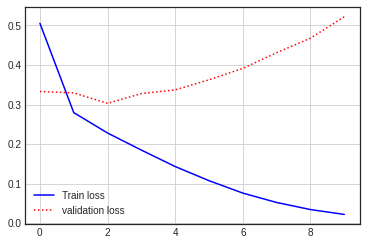

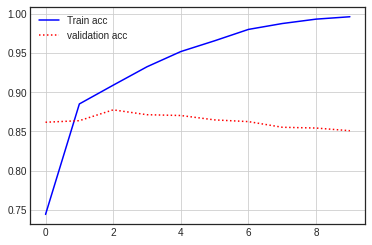

In [28]:
hist_dict2 = history2.history
hist_dict2.keys()

plt.plot(hist_dict2['loss'], 'b-', label = 'Train loss')
plt.plot(hist_dict2['val_loss'], 'r:', label = 'validation loss')
plt.legend()
plt.grid()


plt.figure()
plt.plot(hist_dict2['acc'], 'b-', label = 'Train acc')
plt.plot(hist_dict2['val_acc'], 'r:', label = 'validation acc')
plt.legend()
plt.grid()

In [29]:
model.evaluate(pad_x_test_2, y_test)

# 음 이번엔 84% 나왔네
# 데이터만 더 넣어도 4% 나왔네

782/782 [==============================] - 2s 2ms/step - loss: 0.4940 - acc: 0.8500


[0.49395284056663513, 0.8499600291252136]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [30]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle= True, random_state = 1,
                             remove = ('headers', 'footers', 'quotes'))
documents =dataset.data

print(len(documents))
documents[2]

## 음..전처리가 조 ㅁ필요하구만..

11314


"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [31]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])  
    # 3자 이하는 포함 x, 금지어 x 그리고 나머진 소문자

def tokenize(d):
    return word_tokenize(d)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents}) # document를 article로 다 넣을게
len(news_df)

11314

In [33]:
news_df.replace('', float('NaN'), inplace = True)   # 불필요한것들은 다 공백으로 바꿀게 ex) NaN
news_df.dropna(inplace = True)
print(len(news_df))

# 좀 줄엇지?

11096


In [34]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [35]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [36]:
tokenized_news = news_df['article'].apply(tokenize) # token화 하고
tokenized_news = tokenized_news.to_list( )  # to list로 list값 따로 저장하고

In [37]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]  # 1sentence가 1보다 작을때
news_text = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_text))

# 더 줄엇네

10991


In [38]:
news_text

array([list(['well', 'sure', 'story', 'seem', 'biased', '.', 'what', 'disagree', 'statement', 'u.s.', 'media', 'ruin', 'israels', 'reputation', '.', 'that', 'rediculous', '.', 'u.s.', 'media', 'pro-israeli', 'media', 'world', '.', 'having', 'lived', 'europe', 'realize', 'incidences', 'described', 'letter', 'occured', '.', 'u.s.', 'media', 'whole', 'seem', 'ignore', 'them', '.', 'u.s.', 'subsidizing', 'israels', 'existance', 'europeans', 'least', 'degree', ')', '.', 'think', 'might', 'reason', 'report', 'clearly', 'atrocities', '.', 'what', 'shame', 'austria', ',', 'daily', 'reports', 'inhuman', 'acts', 'commited', 'israeli', 'soldiers', 'blessing', 'received', 'government', 'makes', 'holocaust', 'guilt', 'away', '.', 'after', 'all', ',', 'look', 'jews', 'treating', 'races', 'power', '.', 'unfortunate', '.']),
       list(['yeah', ',', 'expect', 'people', 'read', 'faq', ',', 'etc', '.', 'actually', 'accept', 'hard', 'atheism', '?', 'need', 'little', 'leap', 'faith', ',', 'jimmy', '.', '

## Gensim을 이용한 Word2Vec

### CBOW

In [40]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = news_text, window = 3,
                 size = 100, min_count=5, workers = 4, sg = 0)    # window = 몇개를 예쌍할것인가

                 # 선언과 동시에 모델학습은 이미 다됨
                 

In [42]:
# window를 4로 올려볼게

model = Word2Vec(sentences = news_text, window = 4,
                 size = 100, min_count=5, workers = 4, sg = 0)    # window = 몇개를 예쌍할것인가

                 # 선언과 동시에 모델학습은 이미 다됨

In [43]:
model.wv.similarity('man', 'woman')

# window 4 기준

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8672229

In [44]:
model.most_similar(positive = ['soldiers']) # solider에 대한 긍적적인 결과

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('villages', 0.9789648056030273),
 ('turks', 0.9699219465255737),
 ('killed', 0.9687976837158203),
 ('genocide', 0.9591175317764282),
 ('greeks', 0.9546184539794922),
 ('troops', 0.9525971412658691),
 ('armenia', 0.9497445821762085),
 ('kurds', 0.948516845703125),
 ('slaughter', 0.9470773339271545),
 ('land', 0.946296215057373)]

In [47]:
model.wv.most_similar(positive = ['man','soldiers'], negative = ['woman'])
# man+soldier - woman

# 아 뉴스니까 이스라엘 나왔겠네

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('murders', 0.914236307144165),
 ('jerusalem', 0.9110169410705566),
 ('undeclared', 0.9104316830635071),
 ('turkey', 0.9077118635177612),
 ('attack', 0.905651330947876),
 ('war', 0.904745876789093),
 ('pro-life', 0.903481125831604),
 ('jews', 0.9022386074066162),
 ('israelis', 0.8991217613220215),
 ('men', 0.897841215133667)]

### Skip-gram

In [51]:
from gensim.models import Word2Vec

# sg = 1로 바꾸면 skip -gram으로 바뀜!

model = Word2Vec(sentences = news_text, window = 4,
                 size = 100, min_count=5, workers = 4, sg = 1)

# 단어를 보고 앞뒤 4개를 맞춰야해

In [52]:
model.wv.similarity('man', 'woman')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8178374

In [53]:
model.most_similar(positive = ['soldiers'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('villages', 0.9205030202865601),
 ('wounded', 0.9034820795059204),
 ('azerbaijanis', 0.8989545106887817),
 ('azeri', 0.8961721658706665),
 ('kurds', 0.8938890099525452),
 ('massacre', 0.8936868906021118),
 ('raped', 0.8918534517288208),
 ('civilians', 0.8911533951759338),
 ('troops', 0.8908469080924988),
 ('turks', 0.8868393301963806)]

In [54]:
model.wv.most_similar(positive = ['man', 'soldiers'] , negative = ['woman'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('civilians', 0.7946211099624634),
 ('murders', 0.7908550500869751),
 ('greeks', 0.7898626923561096),
 ('germans', 0.7896819114685059),
 ('fighters', 0.7871211767196655),
 ('arafat', 0.782804012298584),
 ('wwii', 0.7820621728897095),
 ('israelis', 0.7797591686248779),
 ('retaliation', 0.7748889923095703),
 ('killing', 0.7747311592102051)]

### 임베딩 벡터 시각화

In [55]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('news_w2v')   # 모델을 그대로 저장할게

* metadata.tsv와 tensor.tsv 데이터 생성

In [57]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

# meta = 정보담은거
# tensor = 탠서값

2020-11-03 06:23:27,535 - word2vec2tensor - INFO - running /usr/local/lib/python3.6/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2020-11-03 06:23:27,536 - utils_any2vec - INFO - loading projection weights from news_w2v
2020-11-03 06:23:29,495 - utils_any2vec - INFO - loaded (22174, 100) matrix from news_w2v
2020-11-03 06:23:31,186 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2020-11-03 06:23:31,186 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2020-11-03 06:23:31,189 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [60]:
from google.colab import files

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
from google.colab import files

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Embedding Projector: https://projector.tensorflow.org/